In this notebook I will try to obtain the parameters of a normal distribution using the maximum likelihood method, given a known normal distribution.


In [1]:
import numpy as np
from scipy.optimize import fmin
from scipy.stats import norm
import math
import matplotlib.pyplot as plt

The real distribution is 𝒩(μ, σ). The objective is to estimate these parameters starting from the p_data drawn from the distribution.

In [36]:
r_mu = 65
r_sigma = 5
p_data = np.random.normal(r_mu, r_sigma, 100)

We need to compute $\underset{θ}{\operatorname{argmax}} ∑_{i=0}^mlog \ p_{model}(x_i, θ)$ where $p_{model}$ is the distribution of normal variable of parameters $(μ, σ)$.

In [37]:
def neg_log_likelihood(params):
    mu, sigma = params
    if sigma <= 0:
        return np.inf
    n = len(p_data)
    log_likelihood = sum(np.log(1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (p_data - mu)**2 / (2 * sigma**2) )))
    return -log_likelihood

In [38]:
initial_guess = [np.mean(p_data), np.std(p_data)]

In [39]:
mu_est, sigma_est = fmin(neg_log_likelihood, initial_guess, xtol=1e-6, maxfun=1000, maxiter=1000)

Optimization terminated successfully.
         Current function value: 298.788662
         Iterations: 42
         Function evaluations: 85


In [40]:
print(f'mu estimate: {mu_est}\nsigma estimate: {sigma_est}')

mu estimate: 64.52182526364275
sigma estimate: 4.801594682411024


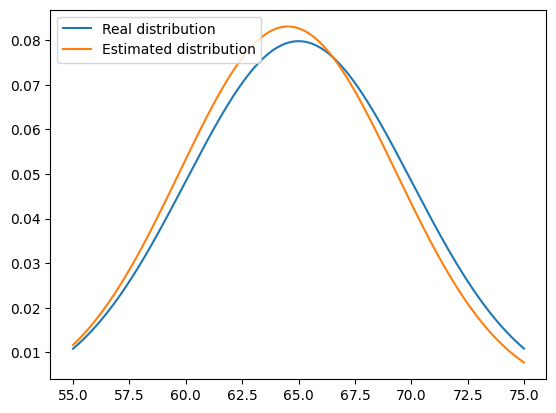

In [41]:
x = np.arange(r_mu - 2*r_sigma, r_mu+2 * r_sigma, 0.01)
plt.plot(x, norm.pdf(x, r_mu, r_sigma), label='Real distribution')
plt.plot(x, norm.pdf(x, mu_est, sigma_est), label='Estimated distribution')
plt.legend(loc='upper left')
plt.show()